In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = 'C:\desk\Desktop\Machine_Learning\project\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
#print(df)

In [3]:
df = df[df['age'] >= 28]
df

,probe_index,name,weight_fresh,weight_at_test,size_x,size_y,size_z,age,density_fresh,density_at_test,...,id_stone,stone_type,slump,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength,slump.1
5,5,Atm_2010_0012_I,8030.0,NaN,151.5,149.6,150.0,28.0,2362.000906,0.000000,...,34.0,crushed_stone,14.0,NaN,NaN,NaN,NaN,NaN,0.000000,14.0
11,5,Atm_2010_0028_II,8050.0,NaN,151.5,149.6,150.0,28.0,2367.883847,0.000000,...,34.0,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,16.5
17,5,Atm_2010_0044_III,8160.0,NaN,151.5,149.6,150.0,28.0,2400.240024,0.000000,...,34.0,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,16.5
23,5,Atm_2010_0065_I,7840.0,7865.0,151.0,150.0,150.0,28.0,2307.579102,2314.937454,...,52.0,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.426049,15.5
24,6,Atm_2010_0065_I,7910.0,7921.0,151.5,149.6,150.0,28.0,2326.703259,2329.938876,...,52.0,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.800109,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,3,Vra_Zimni_0108_III,NaN,7465.0,149.5,150.0,150.0,28.0,0.000000,2219.249350,...,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,15.748495,12.0
7486,4,Vra_Zimni_0108_III,NaN,7450.0,150.0,149.6,149.6,28.0,0.000000,2219.227506,...,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,12.240642,12.0
7487,5,Vra_Zimni_0108_III,NaN,7690.0,150.0,149.8,149.8,28.0,0.000000,2284.606742,...,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,8.295060,12.0
7489,1,Vra_Zimni_0124_IV,NaN,7625.0,151.0,149.7,150.0,28.0,0.000000,2248.794867,...,NaN,crushed_stone,16.0,0.0,0.0,0.0,0.0,0.01,21.916017,16.0


In [4]:
column_names = df.columns.tolist()
print(column_names)

['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age', 'density_fresh', 'density_at_test', 'q_cement', 'q_water', 'id_cement', 'cement_label', 'sand_coarsness', 'q_crushed_sand', 'q_non_crushed_sand', 'q_ash', 'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 'q_stone_3', 'id_stone', 'stone_type', 'slump', 'q_airentrain', 'q_waterproofing', 'q_retardant', 'q_superplast', 'q_plast', 'compressive_strength', 'slump.1']


In [6]:
feature_columns = df[[ 'weight_fresh', 'weight_at_test','density_fresh','density_at_test','q_cement',
                   'q_water','id_cement','sand_coarsness', 'q_crushed_sand', 'q_non_crushed_sand', 'q_ash', 
                   'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 'q_stone_3', 'id_stone', 
                    'q_airentrain', 'q_waterproofing', 'q_retardant', 'q_superplast', 'q_plast']]
#'probe_index', 'name','cement_label'，'q_crushed_sand', 'q_non_crushed_sand', 'q_ash','stone_type',

target_column1 = df['compressive_strength']  #'slump.1'
data1 = pd.concat([feature_columns,target_column1],axis=1)
data1_names = data1.columns.tolist()
#############################################################################################################################
#print(data1_names)
#sns.pairplot(data1)
#plt.show()

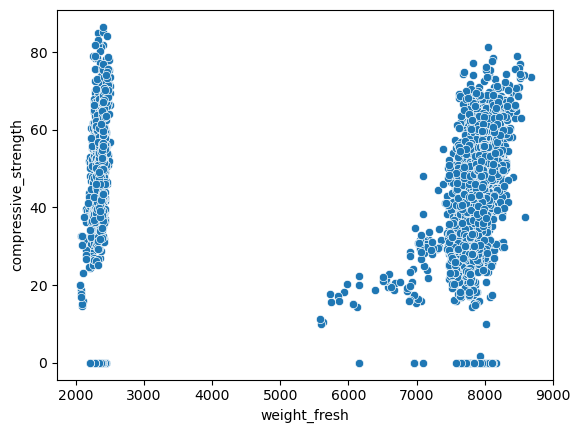

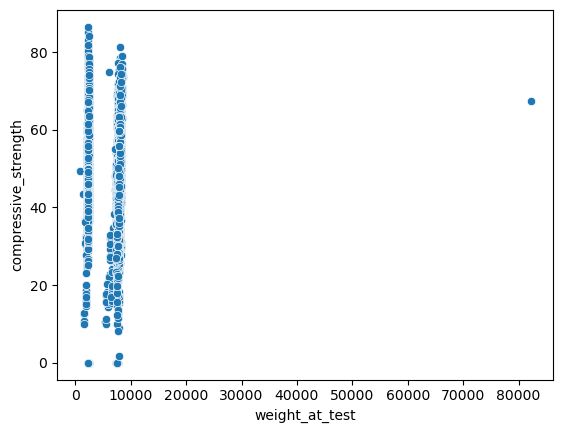

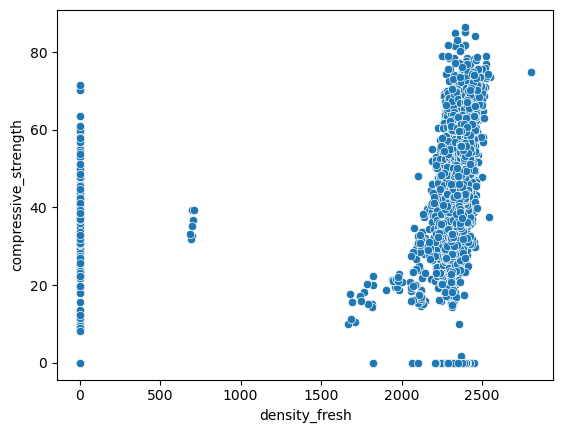

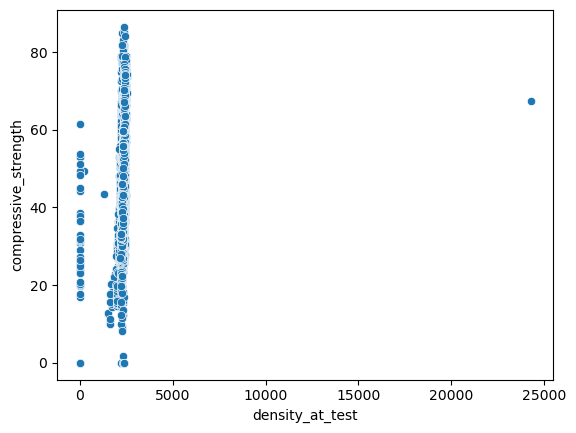

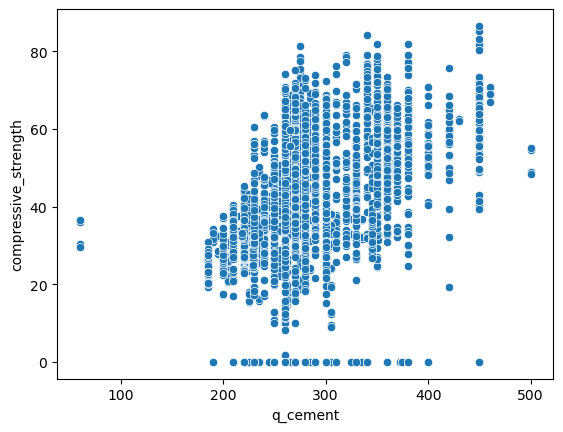

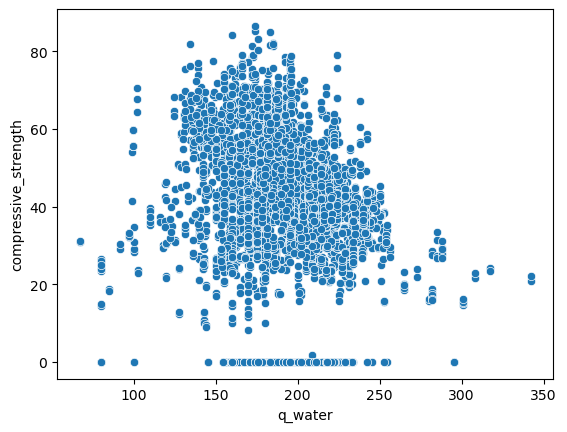

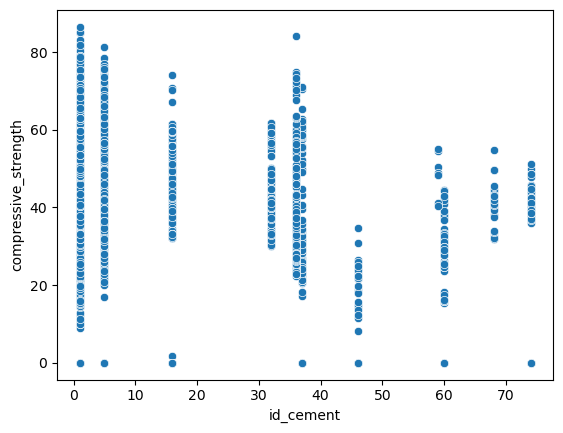

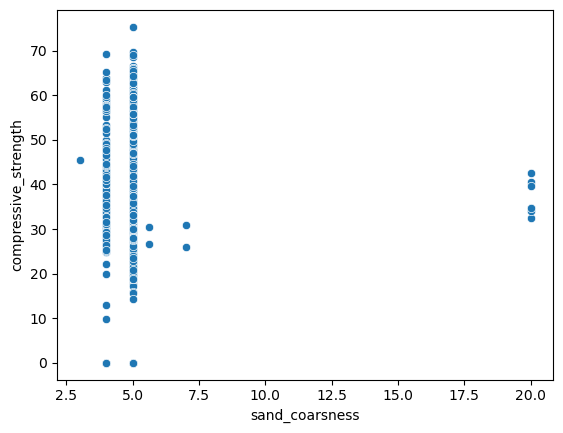

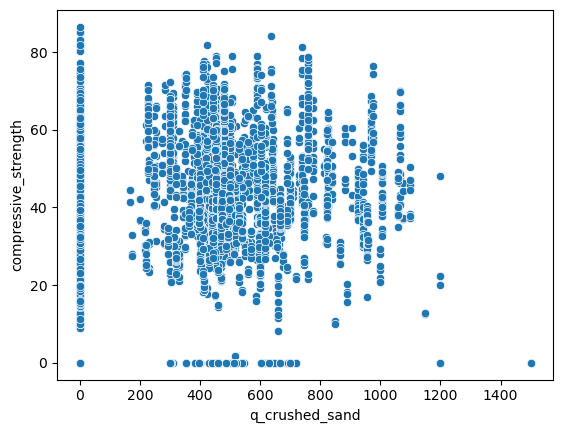

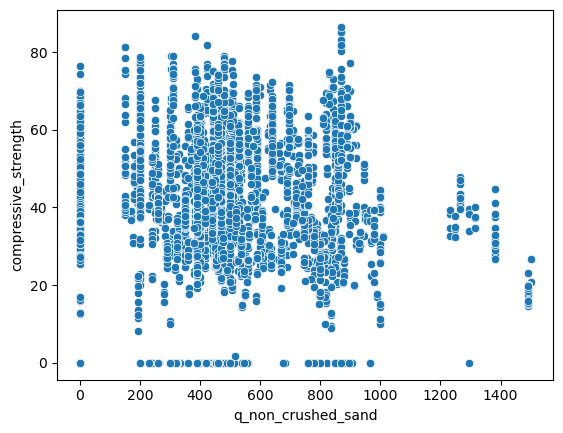

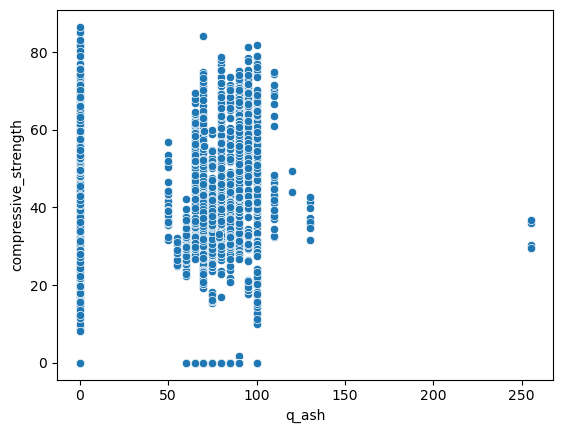

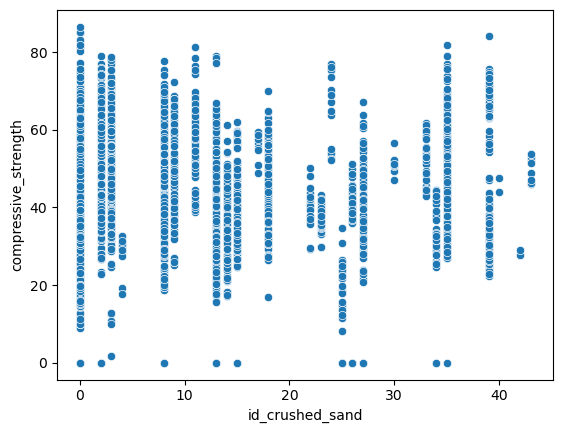

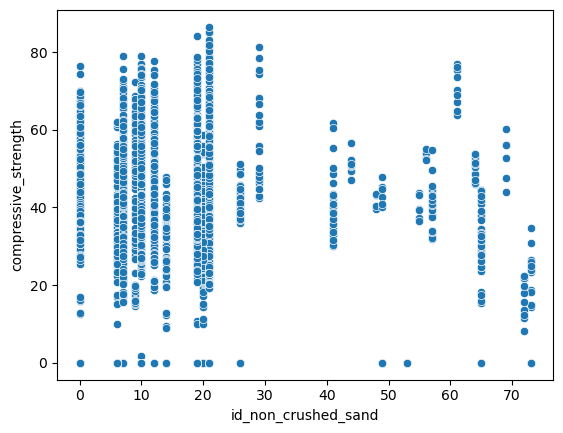

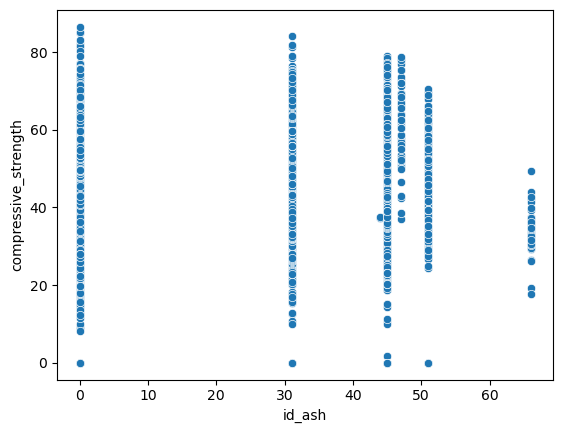

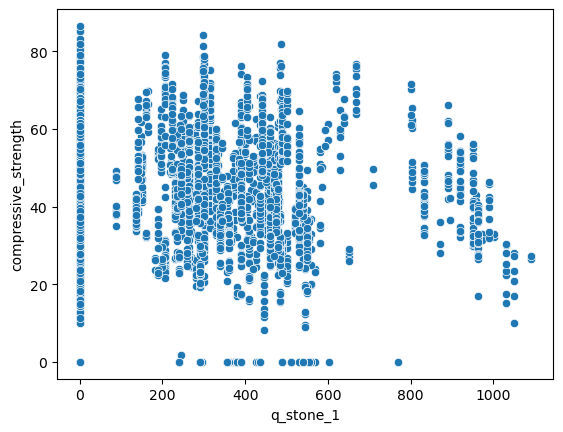

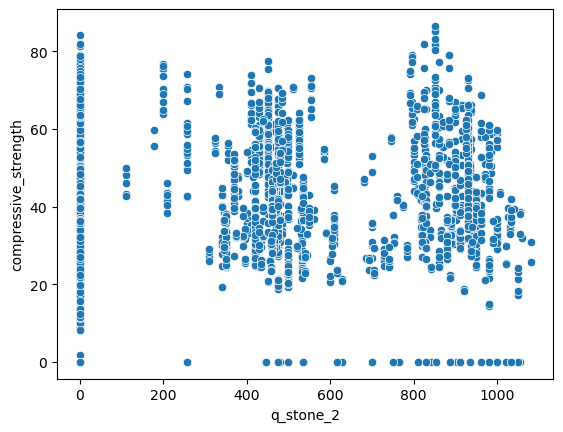

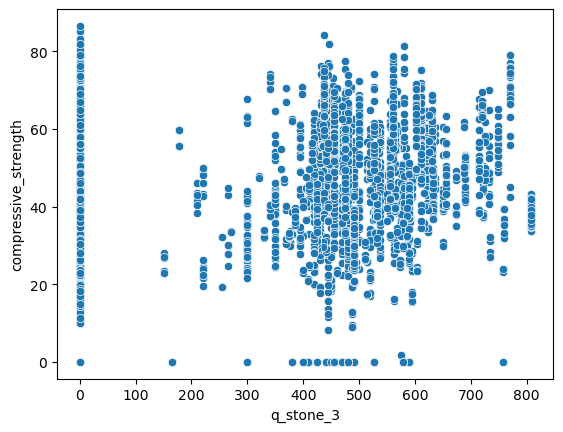

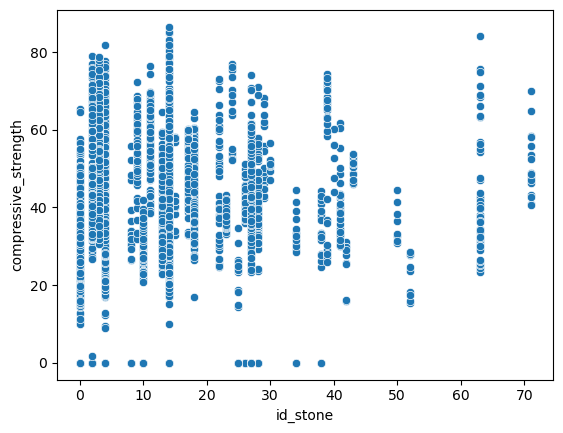

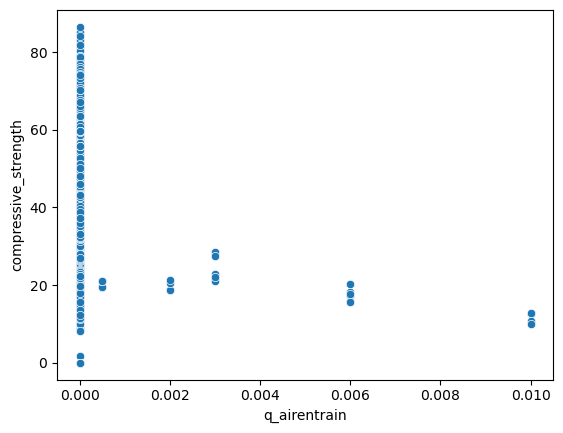

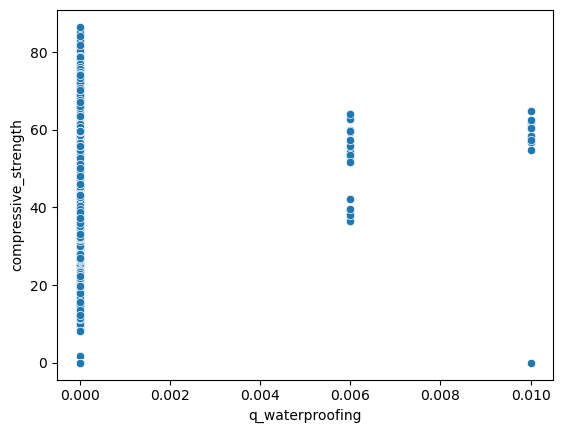

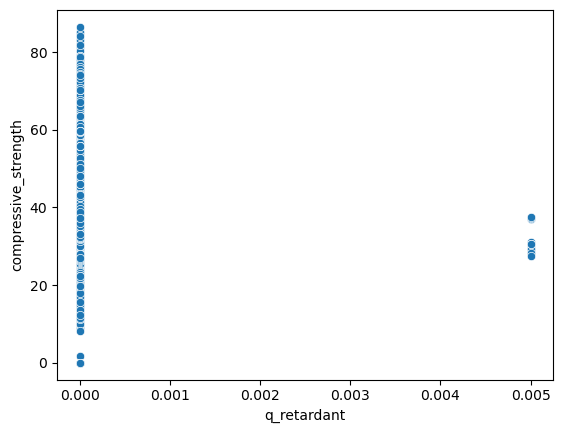

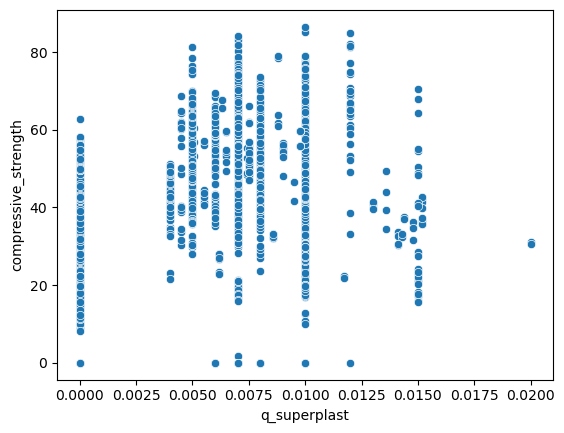

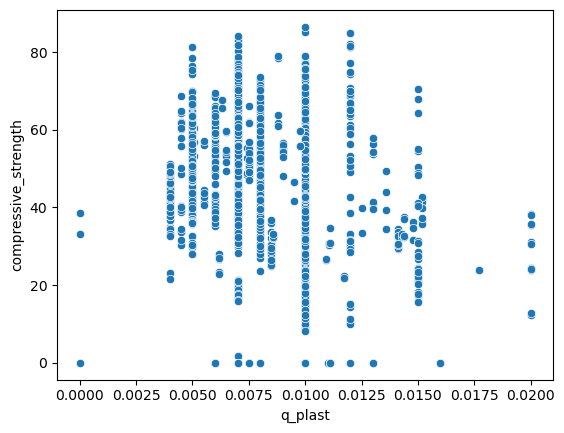

In [7]:
for feature in feature_columns:
    sns.scatterplot(x=feature, y=target_column1, data=df)
    plt.xlabel(feature)
    plt.ylabel('compressive_strength')
    plt.show()

In [8]:
#    所有的            nan变0值
#    重力有两组，      不要，          要density
#    两个density      0值和异常值      全去掉
#    强度             有零值           全去掉
#    q crushed sand   零值
#    q ash            零
#    id ash           零
#    id sand          非线性关系
#    q stone          nan变0值和非线性关系
#    q airentrain     大量的0值   非线性关系  关系不明
#    waterproofing    大量的0值              关系不明
#    q retardant      阻燃剂 大量的零值       关系不明

In [9]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)

feature_columns1 = selector.fit_transform(feature_columns)
feature_indexes = selector.get_support(indices=True)
#feature_columns = feature_columns.iloc[:, selected_feature_indexes]

#feature_columns_index = pd.DataFrame(feature_columns1,columns=feature_columns.columns)
feature_columns = feature_columns.iloc[:,feature_indexes]
feature_columns

,weight_fresh,weight_at_test,density_fresh,density_at_test,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,id_ash,q_stone_1,q_stone_2,q_stone_3,id_stone
5,8030.0,NaN,2362.000906,0.000000,305.0,173.0,16.0,NaN,0.0,819.0,0.0,0.0,53.0,0.0,568.0,0.0,482.0,34.0
11,8050.0,NaN,2367.883847,0.000000,270.0,168.6,60.0,NaN,0.0,821.0,0.0,0.0,53.0,0.0,602.0,0.0,475.0,34.0
17,8160.0,NaN,2400.240024,0.000000,270.0,166.3,60.0,NaN,0.0,684.0,0.0,0.0,53.0,0.0,769.0,0.0,445.0,34.0
23,7840.0,7865.0,2307.579102,2314.937454,225.0,252.8,60.0,NaN,0.0,819.0,75.0,0.0,65.0,31.0,484.0,0.0,595.0,52.0
24,7910.0,7921.0,2326.703259,2329.938876,225.0,252.8,60.0,NaN,0.0,819.0,75.0,0.0,65.0,31.0,484.0,0.0,595.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,NaN,7465.0,0.000000,2219.249350,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN
7486,NaN,7450.0,0.000000,2219.227506,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN
7487,NaN,7690.0,0.000000,2284.606742,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN
7489,NaN,7625.0,0.000000,2248.794867,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN


In [10]:
columns_to_drop = ['weight_fresh', 'weight_at_test','density_at_test']
for column in columns_to_drop:
    del feature_columns[column]
#'probe_index', 'name','cement_label'，'q_crushed_sand', 'q_non_crushed_sand', 'q_ash','stone_type','size_x', 'size_y', 
#'weight_fresh', 'weight_at_test','size_z', 'age',



['density_fresh', 'q_cement', 'q_water', 'id_cement', 'sand_coarsness', 'q_crushed_sand', 'q_non_crushed_sand', 'q_ash', 'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 'q_stone_3', 'id_stone', 'compressive_strength']


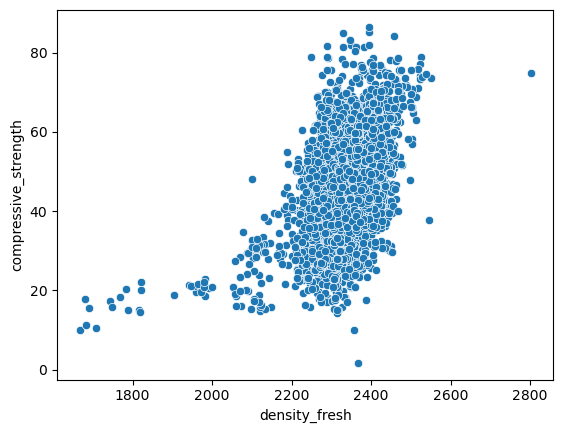

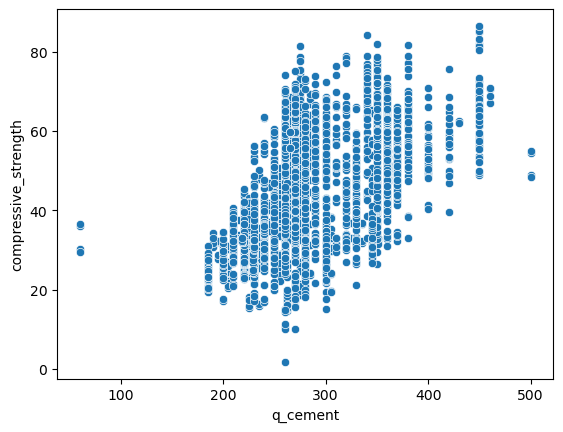

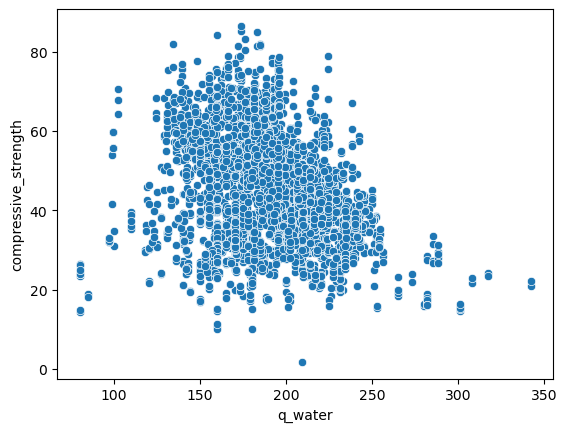

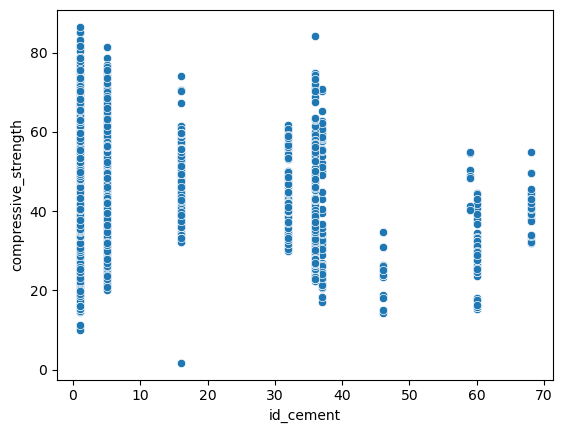

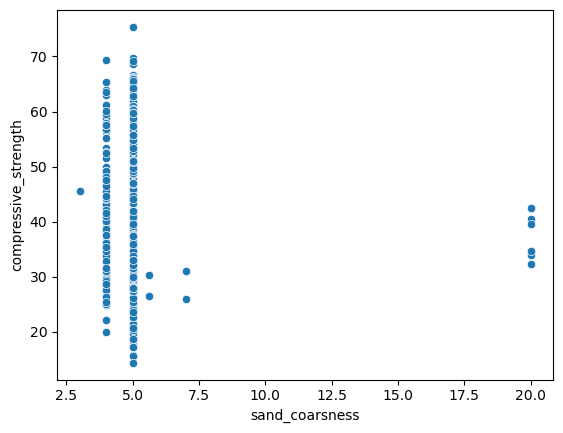

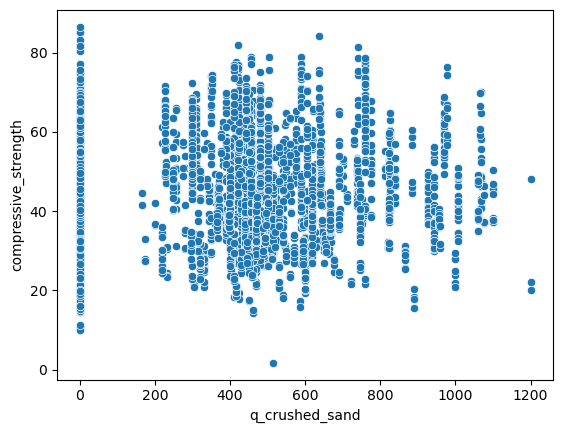

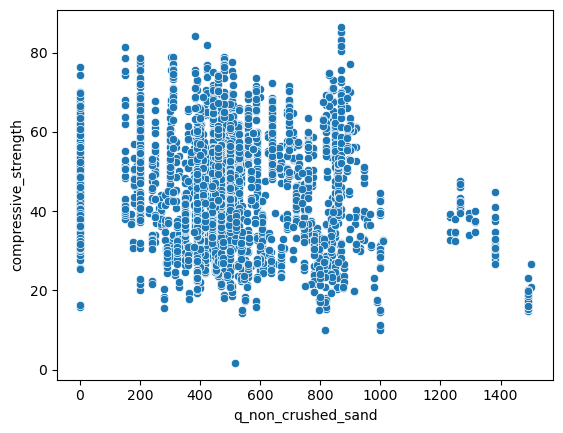

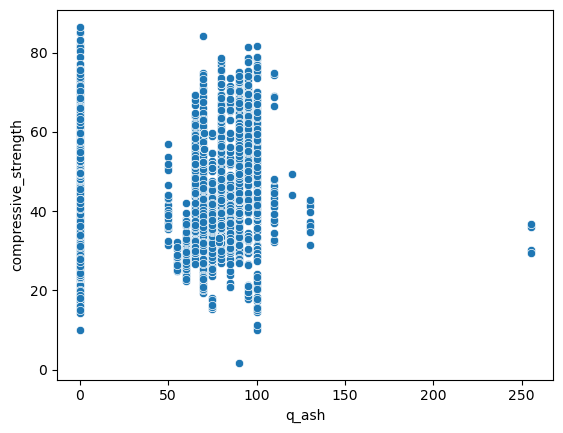

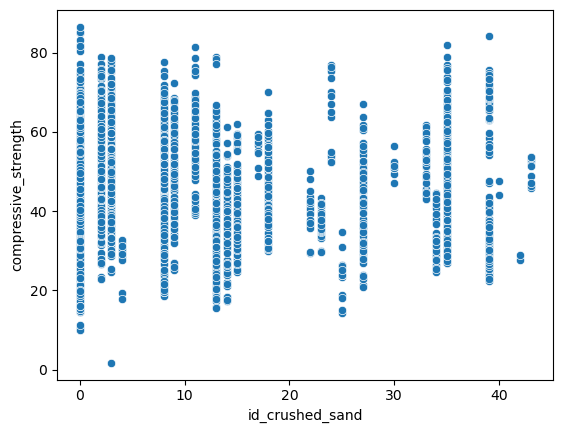

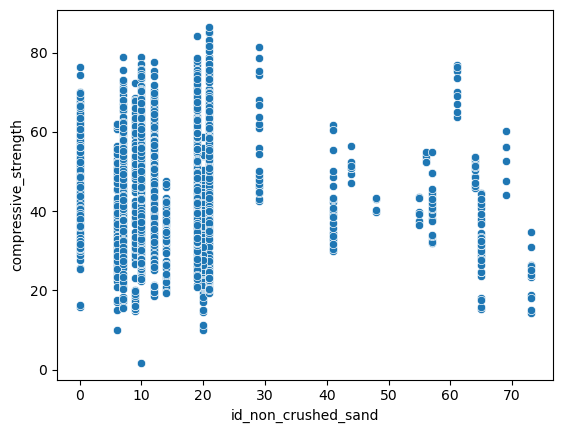

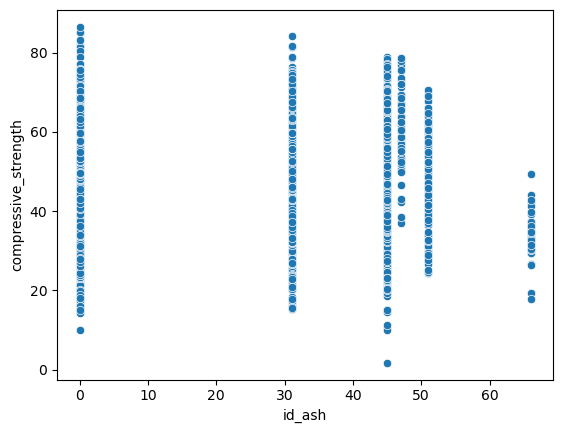

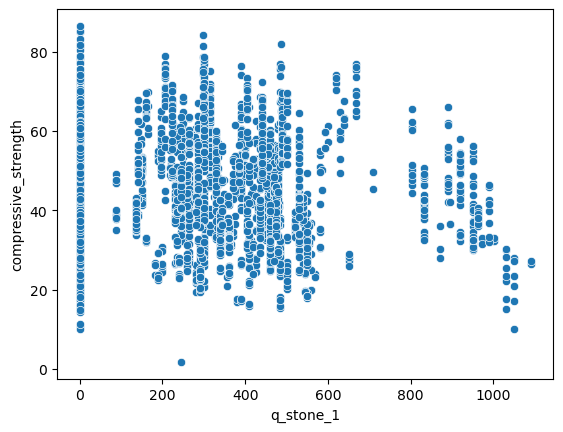

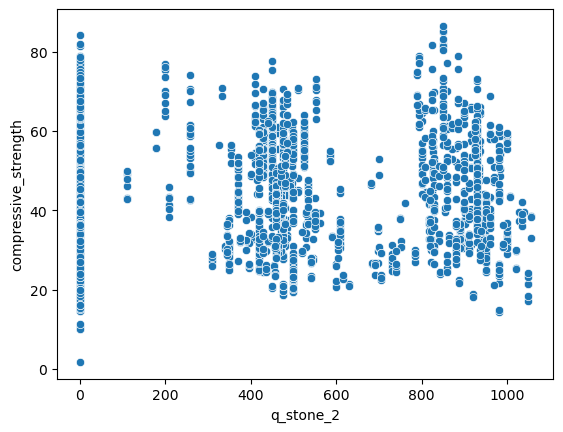

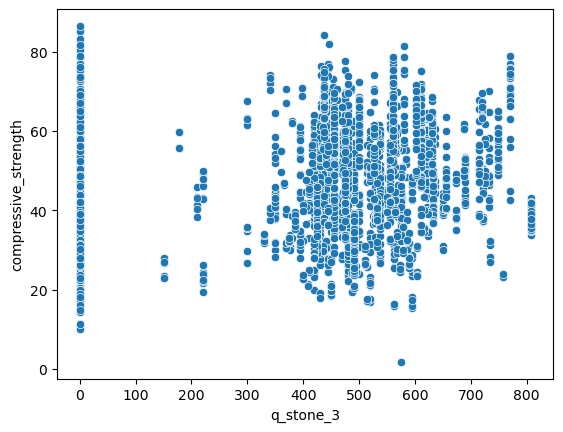

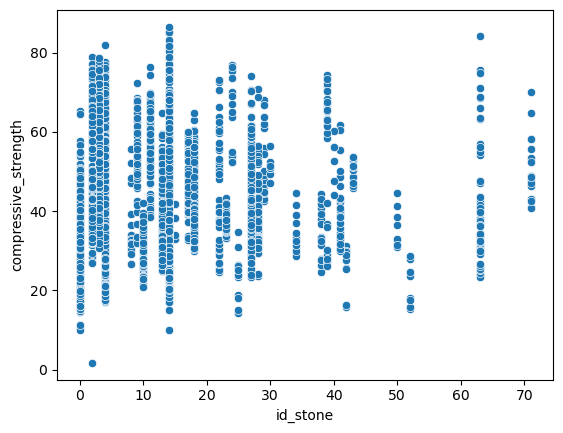

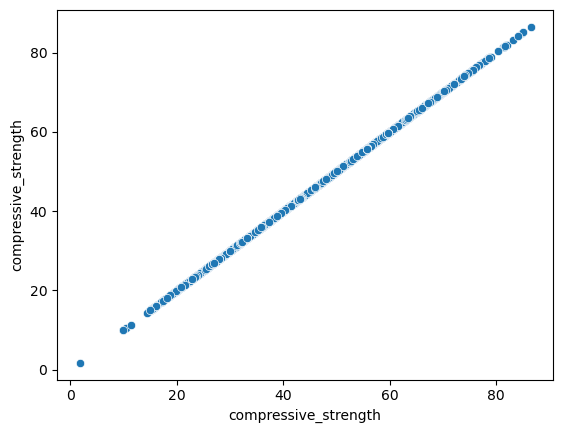

In [11]:
feature_columns = pd.concat([feature_columns,target_column1],axis=1)
feature_columns = feature_columns[(feature_columns['density_fresh'] < 3000)  & (feature_columns['compressive_strength'] > 1)
                                 &(feature_columns['density_fresh'] > 1500) ]

target_column1 = feature_columns['compressive_strength']
######################################################################################################
column_names = feature_columns.columns.tolist()
print(column_names)
######################################################################################################
for feature in feature_columns:
    sns.scatterplot(x=feature, y=target_column1, data=df)
    plt.xlabel(feature)
    plt.ylabel('compressive_strength')
    plt.show()

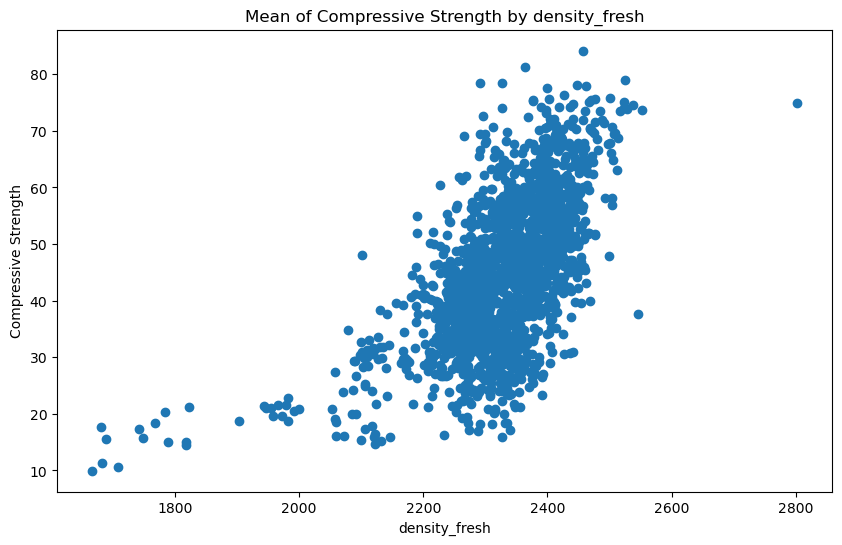

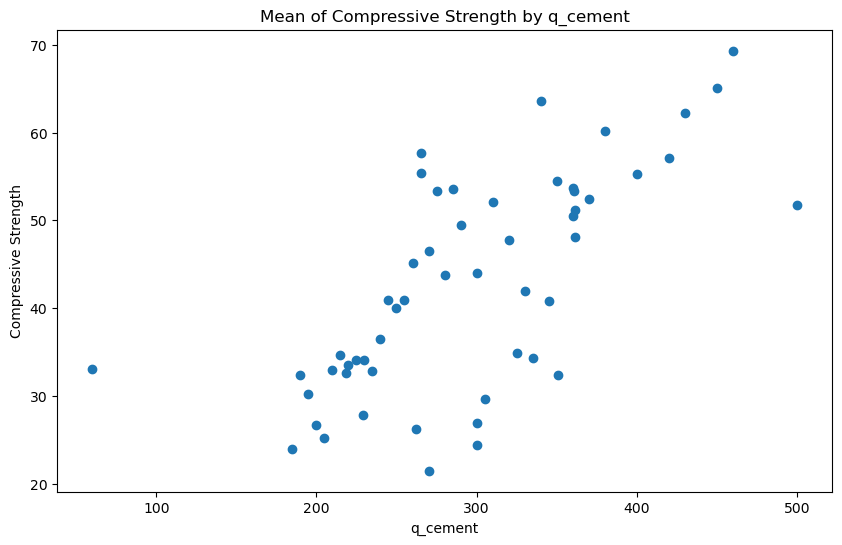

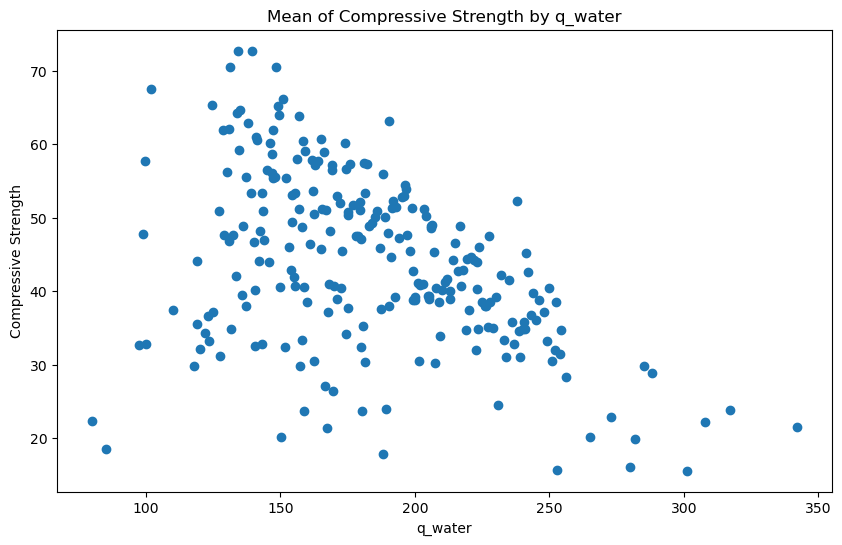

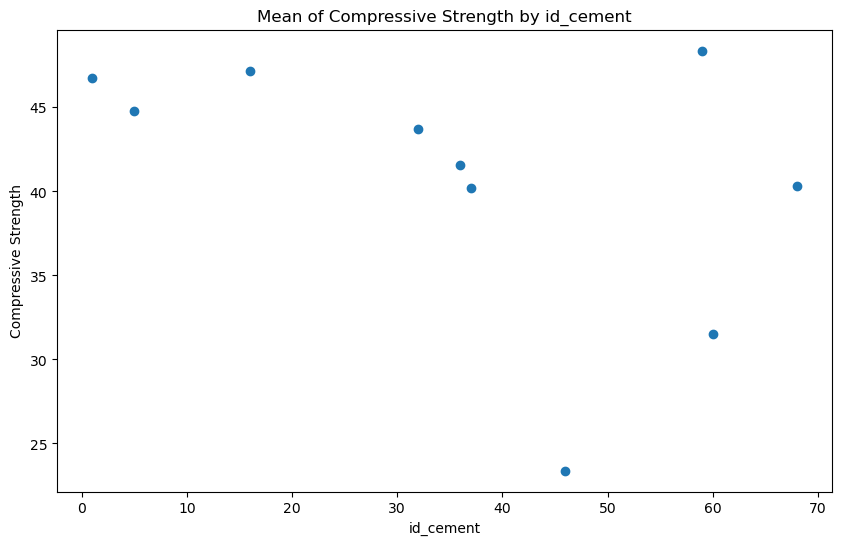

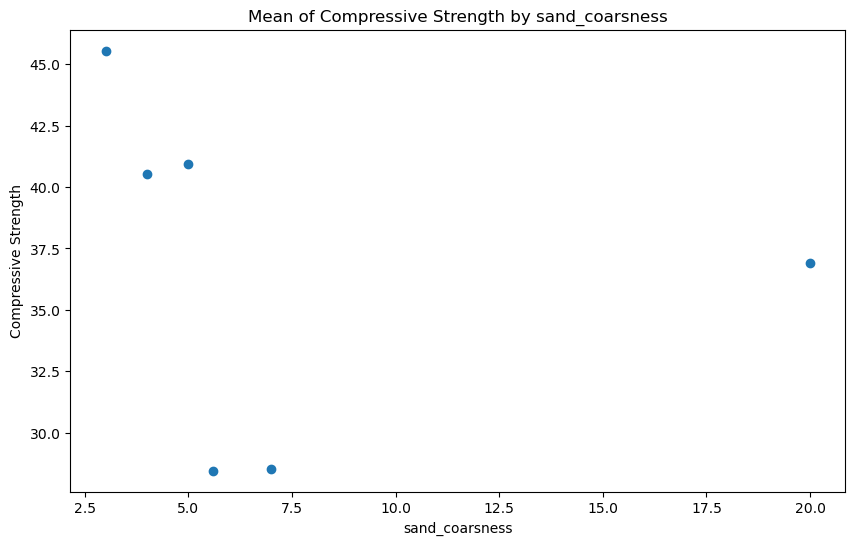

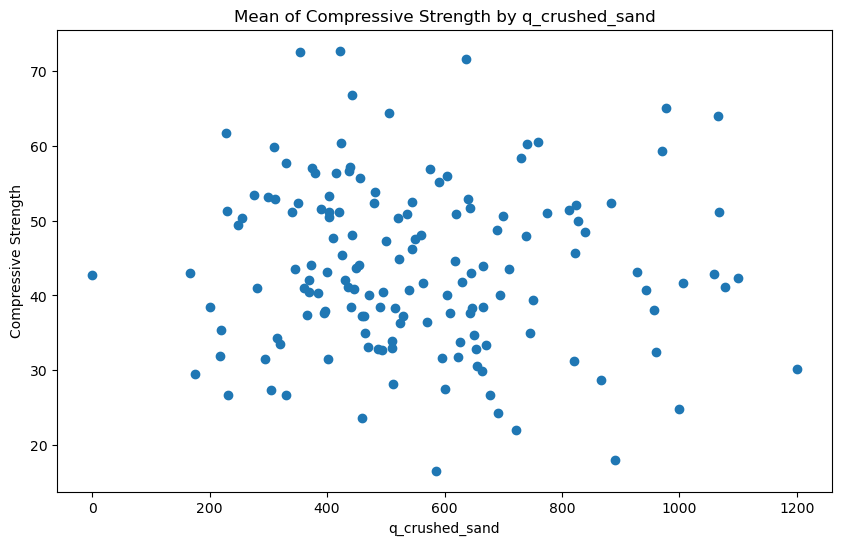

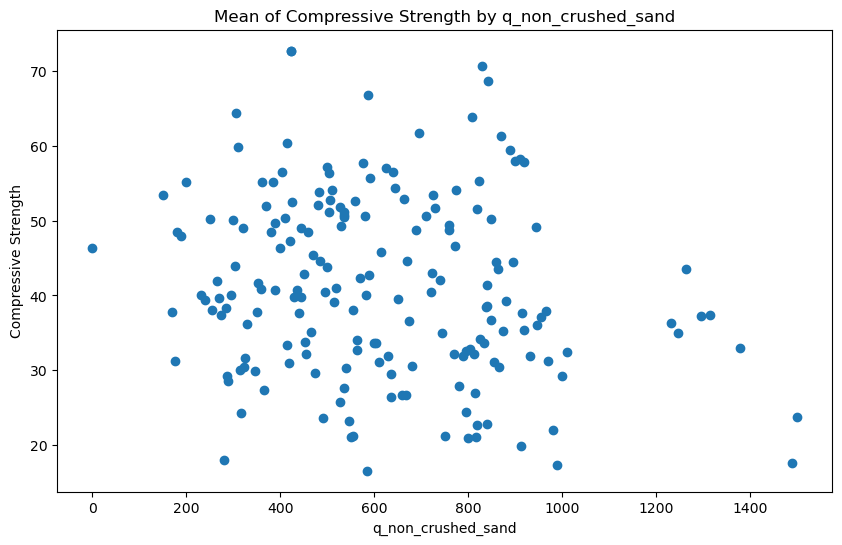

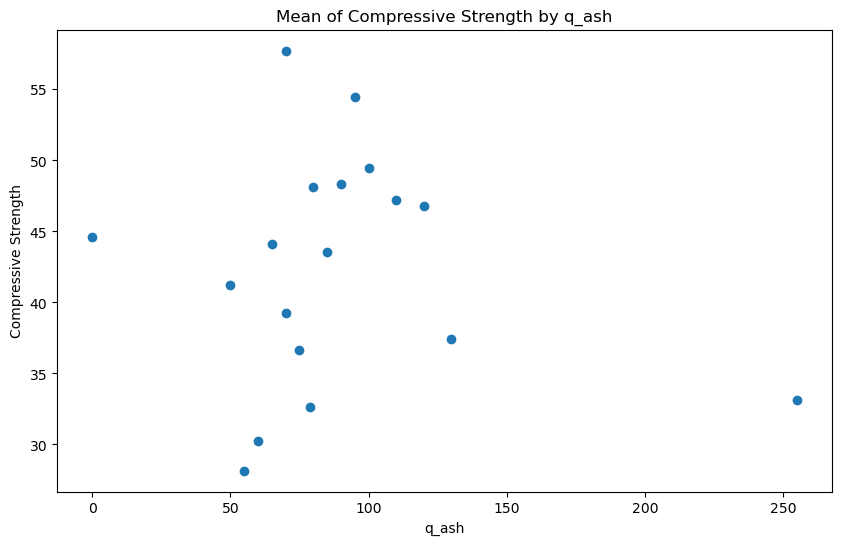

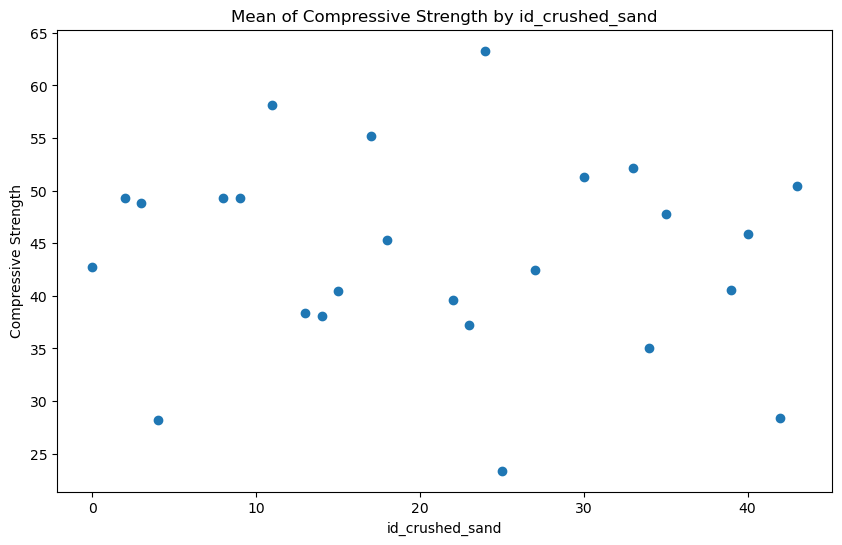

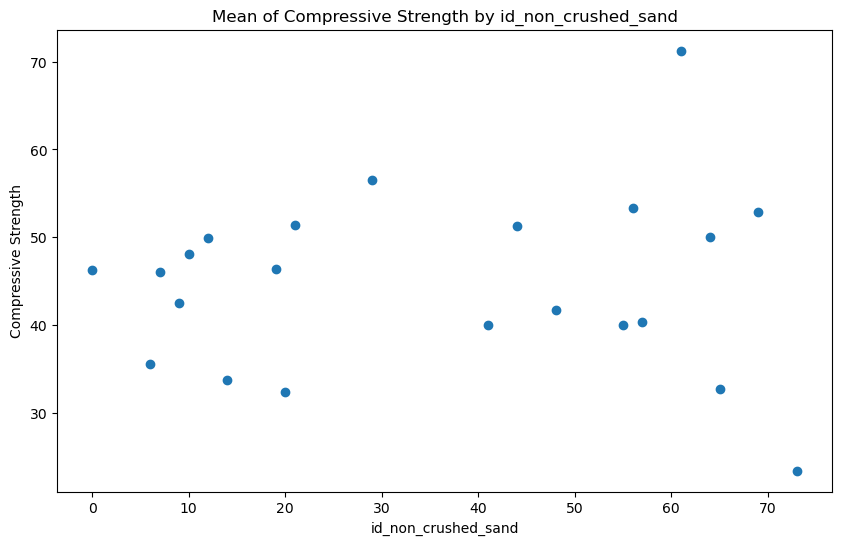

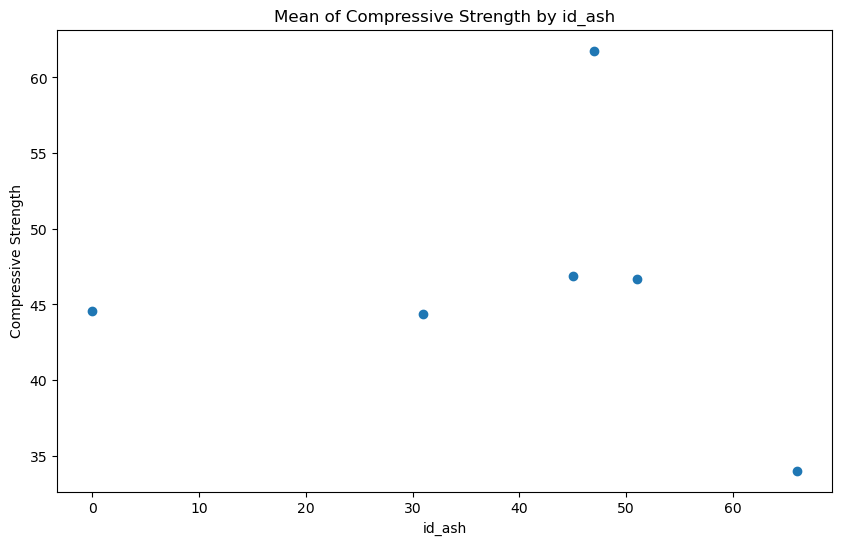

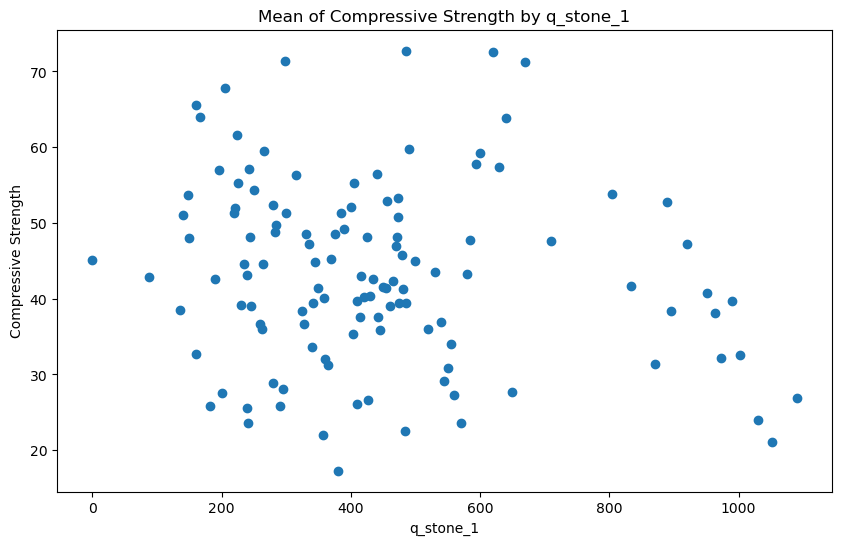

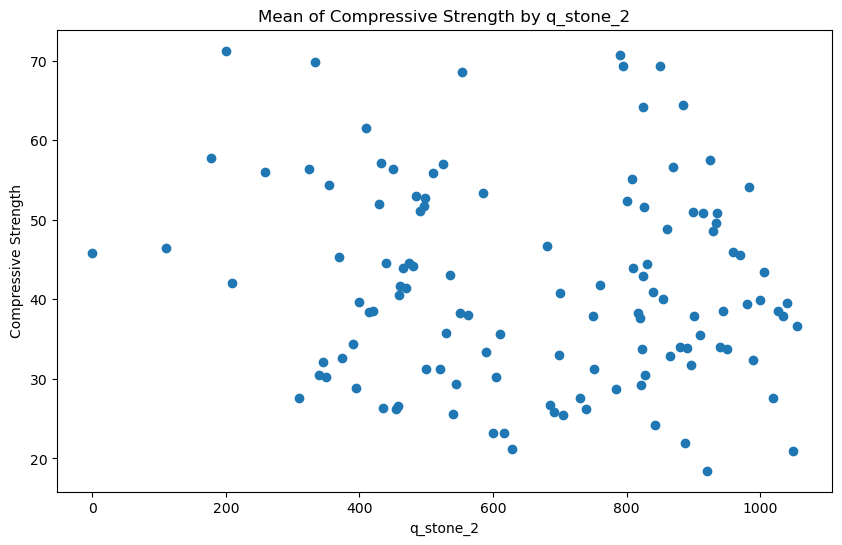

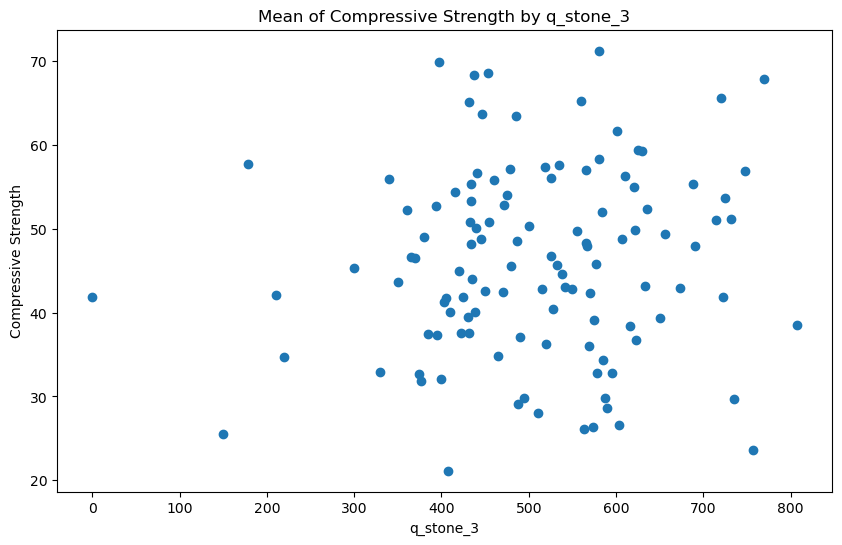

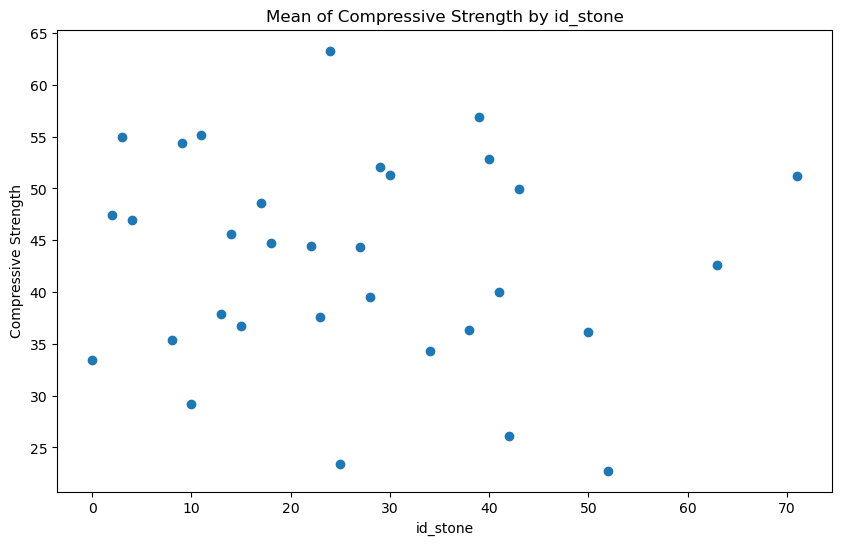

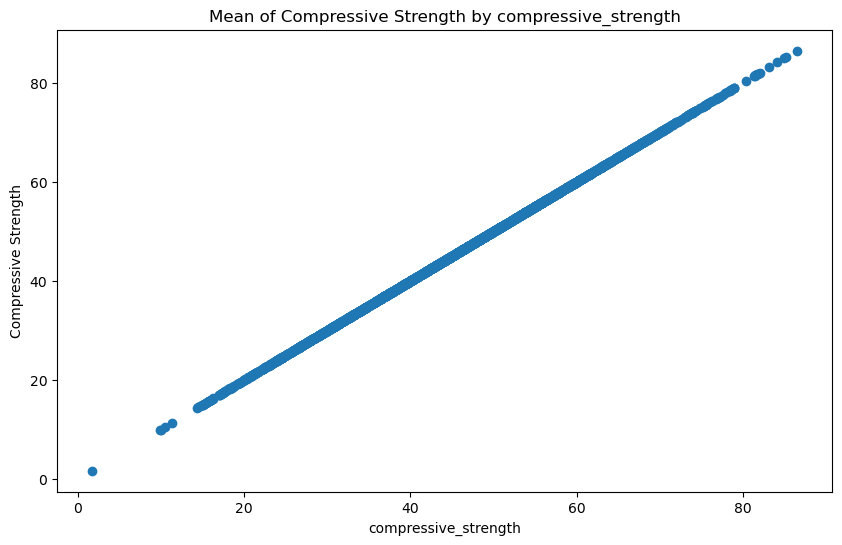

In [12]:
for feature in feature_columns:
    feature_mean = feature_columns.groupby(feature)['compressive_strength'].mean()

    plt.figure(figsize=(10, 6))  # 调整图片大小
    plt.scatter(feature_mean.index, feature_mean.values)
    plt.xlabel(feature)
    plt.ylabel('Compressive Strength')
    plt.title('Mean of Compressive Strength by ' + feature)
    plt.show()

In [12]:
#数据预处理：
#['density_fresh', 'density_at_test', 'q_cement', 'q_water', 'id_cement', 'sand_coarsness', 'q_crushed_sand', 
#'q_non_crushed_sand', 'q_ash', 'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 
#'q_stone_3', 'id_stone', 'q_airentrain', 'q_waterproofing', 'q_retardant', 'q_superplast', 'q_plast', 'compressive_strength']
###########################################################################################################################
#   density_fresh： 有大量零值，代替成平均值或者删除
#   'q_ash'      ： 没找到有什么关系.
#   'id_cement'  ： 没找到关系，有需要的话重新给这个标签进行赋值
#   'sand_coarsness'没找到什么关系
#    q stone        三种大小差距不一的石子  可能会需要去处理
#    'q_airentrain', 'q_waterproofing' 添加剂没找到什么关系
#    q_plast        没找到什么关系
###########################################################################################################################

In [13]:
########################################################################################################################
#             模型选择  线性回归（密度水泥用水量） ;随机森林（其他）；神经网络                                              #
########################################################################################################################
#                   我选择                        随机森林                                                              #
########################################################################################################################
#                                         随机森林 注意事项                                                             #
########################################################################################################################
#     缺失值，异常值处理   特征选择（相关性分析、方差阈值、特征重要性排序等）  特征缩放 （阈值，01等）                         #
########################################################################################################################

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

feature_columns 

,density_fresh,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,id_ash,q_stone_1,q_stone_2,q_stone_3,id_stone,compressive_strength
23,2307.579102,225.0,252.80,60.0,NaN,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,15.426049
24,2326.703259,225.0,252.80,60.0,NaN,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,15.800109
30,2275.555556,225.0,212.00,60.0,NaN,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,23.528889
31,2275.698158,225.0,212.00,60.0,NaN,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,24.545455
37,2281.481481,300.0,220.00,60.0,NaN,0.00,819.00,0.00,0.0,65.0,0.0,484.00,0.0,595.0,52.0,27.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,265.3,99.60,16.0,NaN,329.60,576.50,70.20,3.0,19.0,31.0,593.90,178.0,178.0,2.0,55.720000
7466,2306.666667,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,32.093333
7467,2322.962963,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,33.111111
7468,2322.147651,218.5,97.25,16.0,NaN,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,32.308725


In [14]:
nan_columns = feature_columns.columns[feature_columns.isna().any()].tolist()
nan_columns

['sand_coarsness', 'id_ash', 'id_stone']

In [15]:
feature_columns['sand_coarsness'].fillna(0, inplace=True)
feature_columns = feature_columns.dropna(axis=0,subset=['id_ash', 'id_stone'])
feature_columns

,density_fresh,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,id_ash,q_stone_1,q_stone_2,q_stone_3,id_stone,compressive_strength
23,2307.579102,225.0,252.80,60.0,0.0,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,15.426049
24,2326.703259,225.0,252.80,60.0,0.0,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,15.800109
30,2275.555556,225.0,212.00,60.0,0.0,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,23.528889
31,2275.698158,225.0,212.00,60.0,0.0,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,24.545455
37,2281.481481,300.0,220.00,60.0,0.0,0.00,819.00,0.00,0.0,65.0,0.0,484.00,0.0,595.0,52.0,27.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,265.3,99.60,16.0,0.0,329.60,576.50,70.20,3.0,19.0,31.0,593.90,178.0,178.0,2.0,55.720000
7466,2306.666667,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,32.093333
7467,2322.962963,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,33.111111
7468,2322.147651,218.5,97.25,16.0,0.0,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,32.308725


In [16]:
X = feature_columns.drop('compressive_strength',axis=1)
y = feature_columns['compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred

array([52.71185467, 43.4483183 , 42.60940088, 37.31427583, 51.57461303,
       37.96763353, 50.43491403, 51.89260659, 43.84652295, 43.11938717,
       51.89260659, 41.03202354, 49.10462963, 37.96763353, 34.66634429,
       44.38392821, 50.53897928, 31.53076515, 31.53076515, 50.24144934,
       43.84652295, 48.57848608, 31.53076515, 43.84652295, 44.38392821,
       37.96763353, 34.66634429, 49.87053333, 53.28571599, 45.62105029,
       40.93830534, 52.51838998, 49.76167374, 31.60195427, 31.53076515,
       52.45844427, 52.57837994, 50.32491721, 50.24144934, 39.75185815,
       53.85155367, 31.53076515, 52.81591992, 52.46435826, 51.14612692,
       49.07200735, 43.55717788, 31.53076515, 49.76167374, 43.37672689,
       37.89644441, 49.10462963, 45.61370092, 53.28571599, 37.96763353,
       51.14612692, 43.29515629, 34.66634429, 51.00877535, 31.53076515,
       49.10462963, 43.84652295, 46.19398726, 31.53076515, 52.51838998,
       49.71530579, 52.71185467, 49.8785537 , 51.68009283, 43.37

In [18]:
variance = np.var(y_pred - y_test)
variance            #方差

104.12253265053045

In [19]:
std_deviation = np.std(y_pred - y_test)
std_deviation       #标准差

10.204044916136466

In [39]:
'''df['density_fresh'] = df['density_fresh'].round(0)
result = df.groupby('density_fresh').agg({'compressive_strength': ['mean', 'median'], 'slump': ['mean', 'median']})
result.plot(kind='bar')
plt.title('Average and Median of compressive_strength and slimp by density_fresh')
plt.xlabel('density_fresh')
plt.ylabel('Values')
plt.show()'''

"df['density_fresh'] = df['density_fresh'].round(0)\nresult = df.groupby('density_fresh').agg({'compressive_strength': ['mean', 'median'], 'slump': ['mean', 'median']})\nresult.plot(kind='bar')\nplt.title('Average and Median of compressive_strength and slimp by density_fresh')\nplt.xlabel('density_fresh')\nplt.ylabel('Values')\nplt.show()"

In [20]:
'''fig, ax = plt.subplots()
for i, target in enumerate(target_columns):
    ax.bar(feature_columns, correlation_values[i], label=target)
ax.set_xlabel('特征列')
ax.set_ylabel('相关系数')
ax.set_title('特征列与预测列之间的相关性')
ax.legend()
plt.xticks(rotation=45)
plt.show()'''

"fig, ax = plt.subplots()\nfor i, target in enumerate(target_columns):\n    ax.bar(feature_columns, correlation_values[i], label=target)\nax.set_xlabel('特征列')\nax.set_ylabel('相关系数')\nax.set_title('特征列与预测列之间的相关性')\nax.legend()\nplt.xticks(rotation=45)\nplt.show()"